# Histogramas

En una tabla, cada columna tiene el mismo tipo de valor. 
También tienen que ser comparables. 

## Tipos de datos: 

    * Categóricos: cada valor proviene de un inventorio fijo 
            - Pueden tener un orden o no.
            - Dos valores son iguales o diferentes.
            - Sirven para agrupar, unir, o pivot. 
    
    * Numéricos: 
            - Tienen la misma escala - grados C o F.
            - Tienen orden. 
            - Usar bin y hist. 
            
            
Binning(Agrupar): 
    Contar el número de valores numéricos que están en un rango (o bin). 
    
    Bin está definido por su cota inferior - que está incluida en el bin.
    La cota superior está incluida en el siguiente bin. 
     
    e.g. Puedo crear las siguientes categorías:
    
                160 - 165 - 170 - 175 - 180
    
    Es una forma de convertir datos numéricos en categóricos.

Histograma: 
    es un gráfico que muestra la proporción de los datos numéricos contenidos en los bins.
    

In [5]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ readr   1.3.1
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ ggplot2 3.2.0     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [39]:
pop_us <- readr::read_csv("../tablas/pop_us.csv")

head(pop_us)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  SEX = col_double(),
  AGE = col_double(),
  CENSUS2010POP = col_double(),
  ESTIMATESBASE2010 = col_double(),
  POPESTIMATE2010 = col_double(),
  POPESTIMATE2011 = col_double(),
  POPESTIMATE2012 = col_double(),
  POPESTIMATE2013 = col_double(),
  POPESTIMATE2014 = col_double()
)


X1,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
2,0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
3,0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
4,0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
5,0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
6,0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858


In [40]:
pop_Simple <- pop_us %>% select(c(SEX, AGE, POPESTIMATE2010, POPESTIMATE2014))

head(pop_Simple)

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
<dbl>,<dbl>,<dbl>,<dbl>
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858


In [41]:
library(ggplot2movies)

dim(movies)
head(movies)

[1] 58788    24

title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
$,1971,121,NA,6.4,348,4.5,4.5,4.5,4.5,⋯,4.5,4.5,,0,0,1,1,0,0,0
$1000 a Touchdown,1939,71,NA,6.0,20,0.0,14.5,4.5,24.5,⋯,4.5,14.5,,0,0,1,0,0,0,0
$21 a Day Once a Month,1941,7,NA,8.2,5,0.0,0.0,0.0,0.0,⋯,24.5,24.5,,0,1,0,0,0,0,1
"$40,000",1996,70,NA,8.2,6,14.5,0.0,0.0,0.0,⋯,34.5,45.5,,0,0,1,0,0,0,0
"$50,000 Climax Show, The",1975,71,NA,3.4,17,24.5,4.5,0.0,14.5,⋯,0.0,24.5,,0,0,0,0,0,0,0
$pent,2000,91,NA,4.3,45,4.5,4.5,4.5,14.5,⋯,14.5,14.5,,0,0,0,1,0,0,0


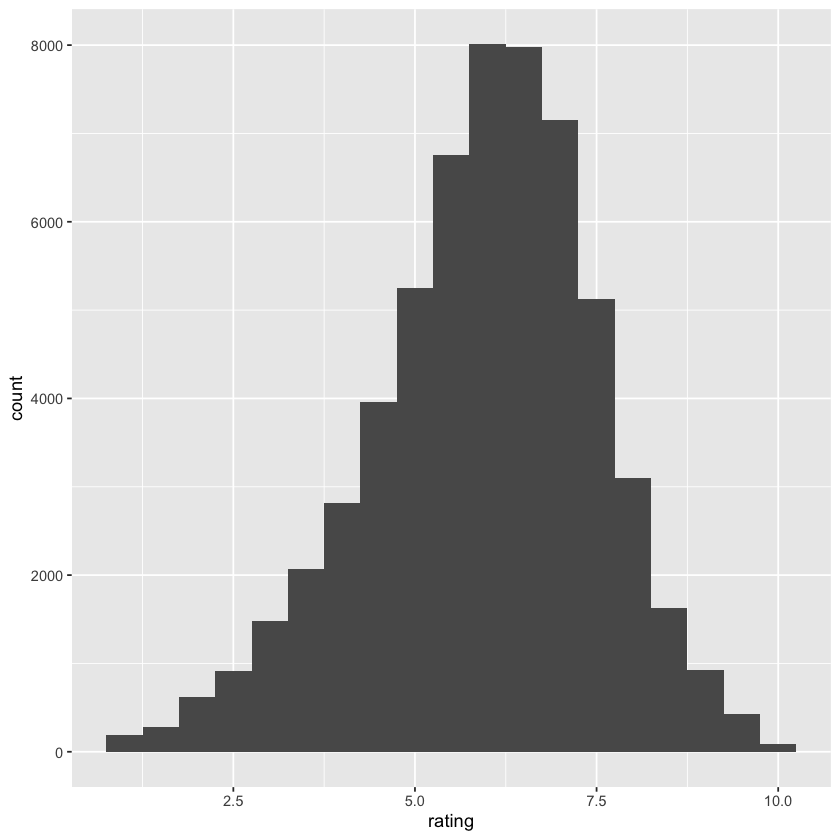

In [42]:
# r1-r10 son percentil de personas que le dieron la nota # a la película.

movies_hist <- ggplot(movies, aes(x=rating))

movies_hist + geom_histogram(binwidth = 0.5)

In [43]:
movies_simple <- movies %>% select(title, rating, budget) %>% 
                            mutate(rating = round(rating, 0)) %>% 
                            group_by(rating) %>% summarise(count=n())

movies_simple

rating,count
<dbl>,<int>
1,272
2,1298
3,2685
4,6309
5,9509
6,17233
7,12506
8,6993
9,1689


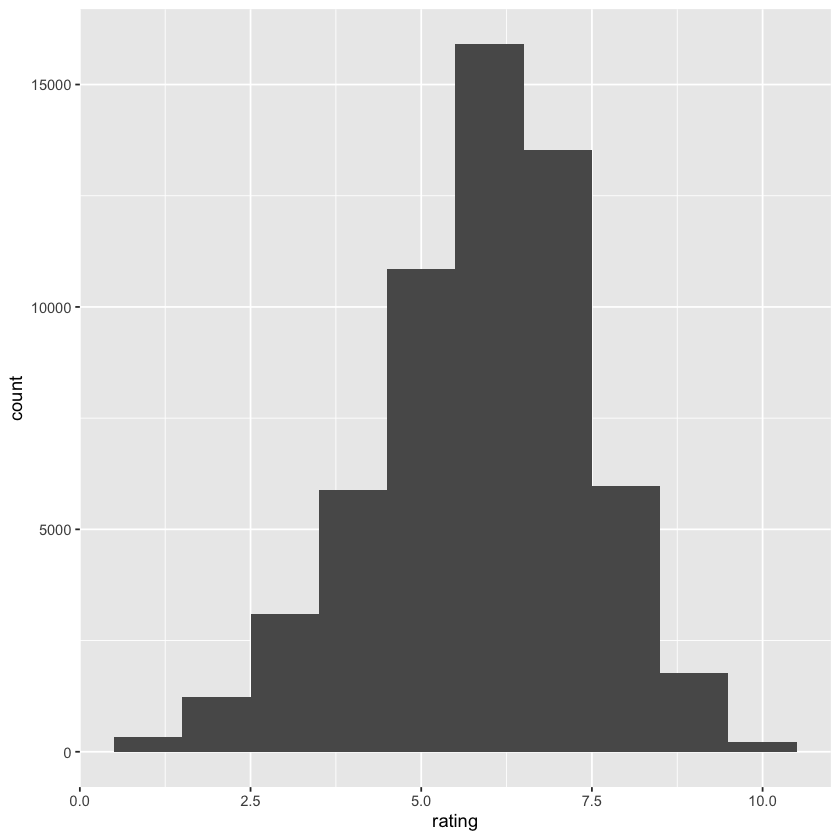

In [44]:
movies_hist + geom_histogram(binwidth = 1, aes(x=rating))

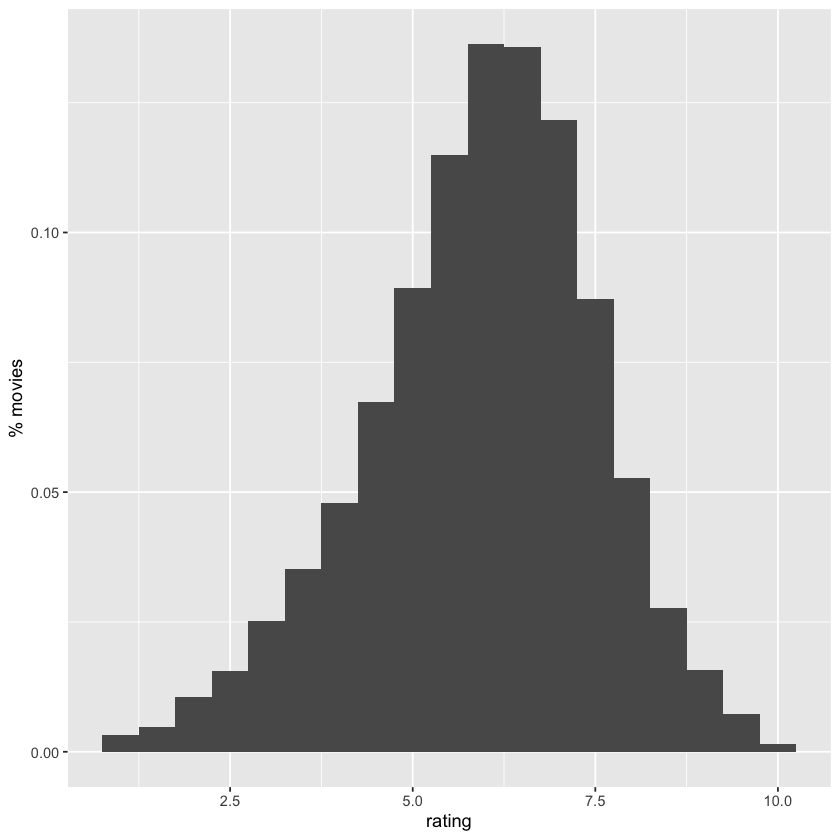

In [47]:
ggplot(movies, aes(x = rating, y = stat(count / sum(count)))) + 
    geom_histogram(binwidth=0.5) + ylab("% movies")

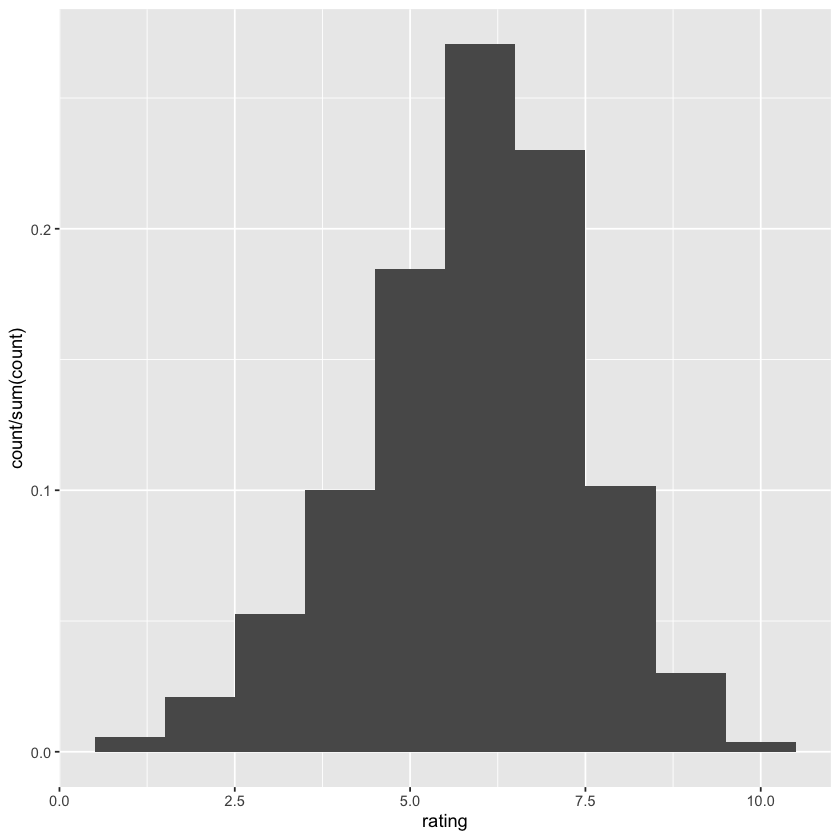

In [48]:
movies_hist + geom_histogram(binwidth = 1, aes(x=rating, y=..count../sum(..count..)))

In [49]:
movies_budget <- movies %>% select(title, rating, budget) %>% 
                    filter(!is.na(budget)) %>%
                    mutate(`Budget (Millions of Dollars)` = budget / 1e6)


head(movies_budget)

title,rating,budget,Budget (Millions of Dollars)
<chr>,<dbl>,<int>,<dbl>
'G' Men,7.2,450000,0.450
'Manos' the Hands of Fate,1.6,19000,0.019
'Til There Was You,4.8,23000000,23.000
.com for Murder,3.7,5000000,5.000
10 Things I Hate About You,6.7,16000000,16.000
100 Mile Rule,5.6,1100000,1.100


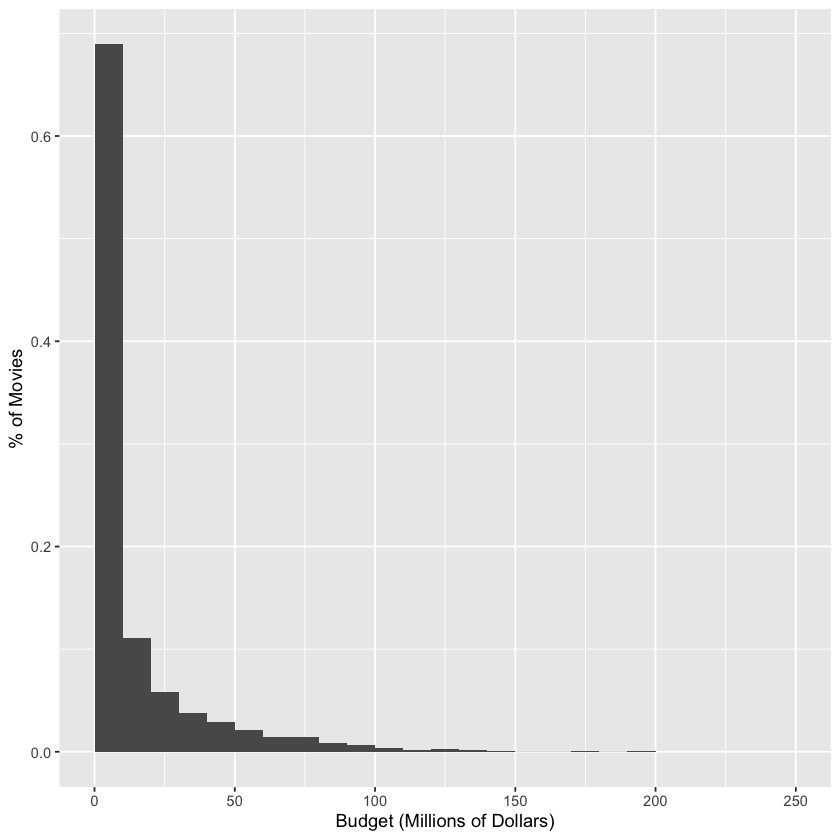

In [61]:
ggplot(movies_budget, aes(x = `Budget (Millions of Dollars)`, y = stat(count / sum(count)))) + 
            geom_histogram(breaks = seq(0, 250, 10)) + 
            scale_y_continuous(labels = scales::percent_format()) +
            labs(y = '% of Movies')

## Dibujar un histograma

Lo interesante es tener una buena visualización: tener la buena forma. 

Tienen dos propiedades:
    
        * bins son contiguos.
        * área es proporcional al número de elementos contenidos en el bin.
        
altura = (# de elementos en el bin)/(largo del bin)



In [57]:
trips <- readr::read_csv("../tablas/bike data/201508_trip_data.csv")
head(trips)

Parsed with column specification:
cols(
  `Trip ID` = col_double(),
  Duration = col_double(),
  `Start Date` = col_character(),
  `Start Station` = col_character(),
  `Start Terminal` = col_double(),
  `End Date` = col_character(),
  `End Station` = col_character(),
  `End Terminal` = col_double(),
  `Bike #` = col_double(),
  `Subscriber Type` = col_character(),
  `Zip Code` = col_character()
)


Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118


In [58]:
max(trips$Duration/60)

[1] 287840

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


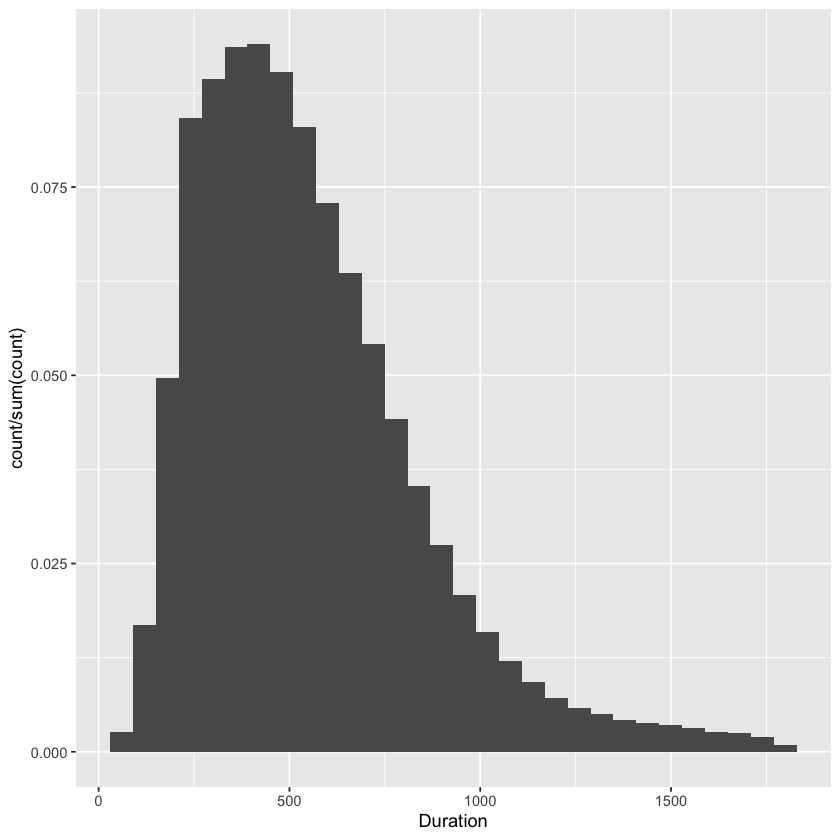

In [59]:
viajes <- trips %>% filter(Duration < 30*60) # menos de 30 mins

ggplot(viajes, aes(x=Duration, y=..count../sum(..count..))) + geom_histogram()

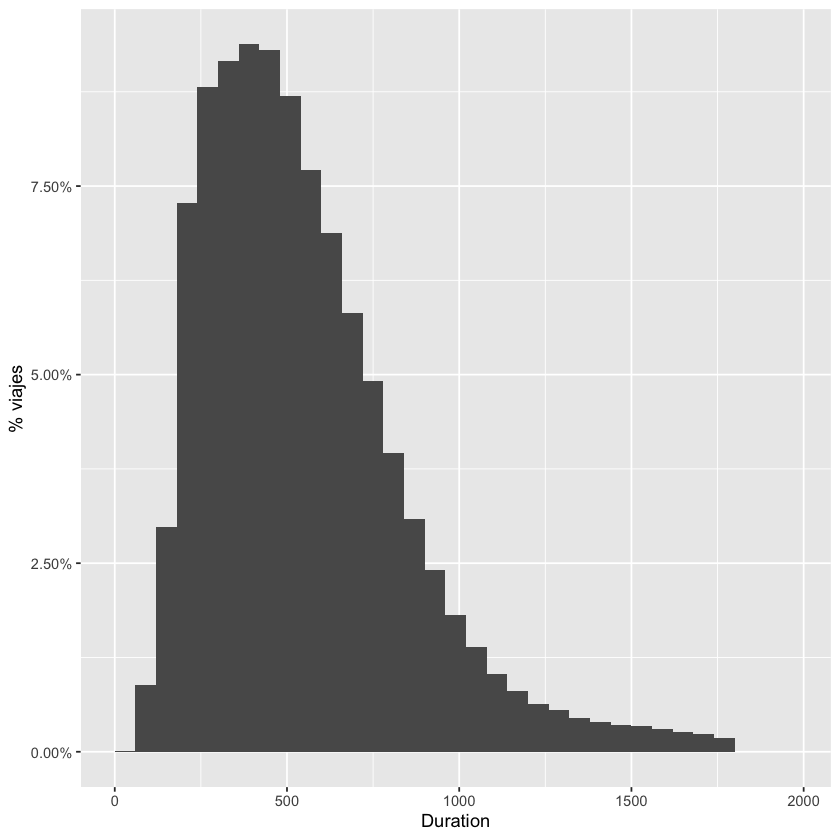

In [63]:
ggplot(viajes, aes(x=Duration, y=..count../sum(..count..))) + 
            geom_histogram(breaks = seq(0,2000,by=60)) + 
            ylab("% viajes") +
            scale_y_continuous(labels = scales::percent_format()) 

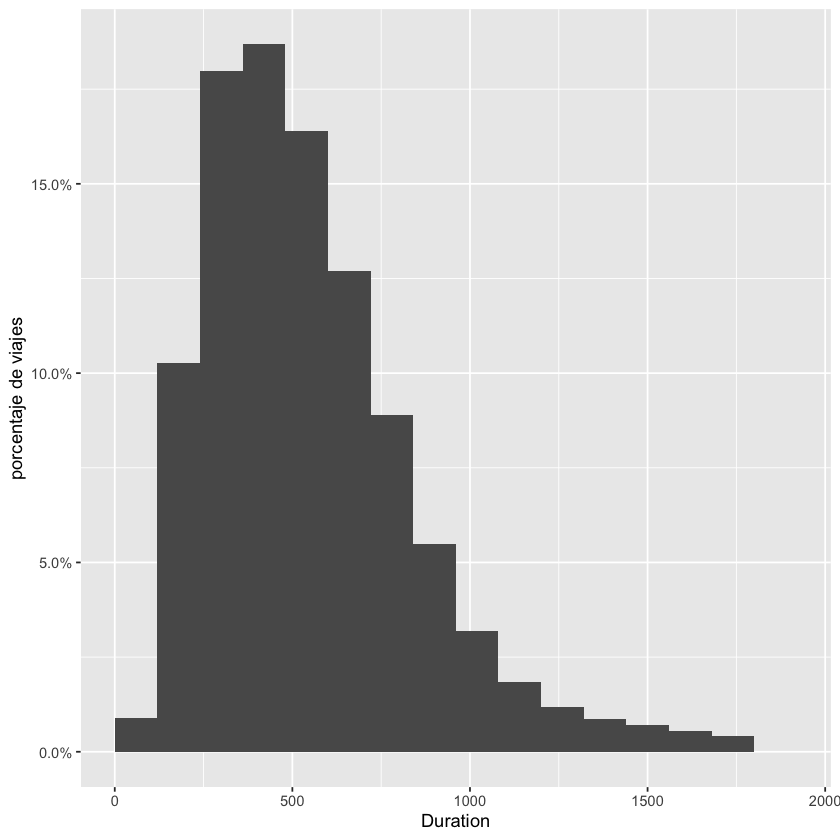

In [64]:
ggplot(viajes) + geom_histogram(breaks = seq(0,2000,by=2*60), aes(x=Duration, y = (..count..)/sum(..count..))) +
            ylab("porcentaje de viajes") +
            scale_y_continuous(labels = scales::percent_format()) 

# cuidado con los detalles: prueben varios binwidths.

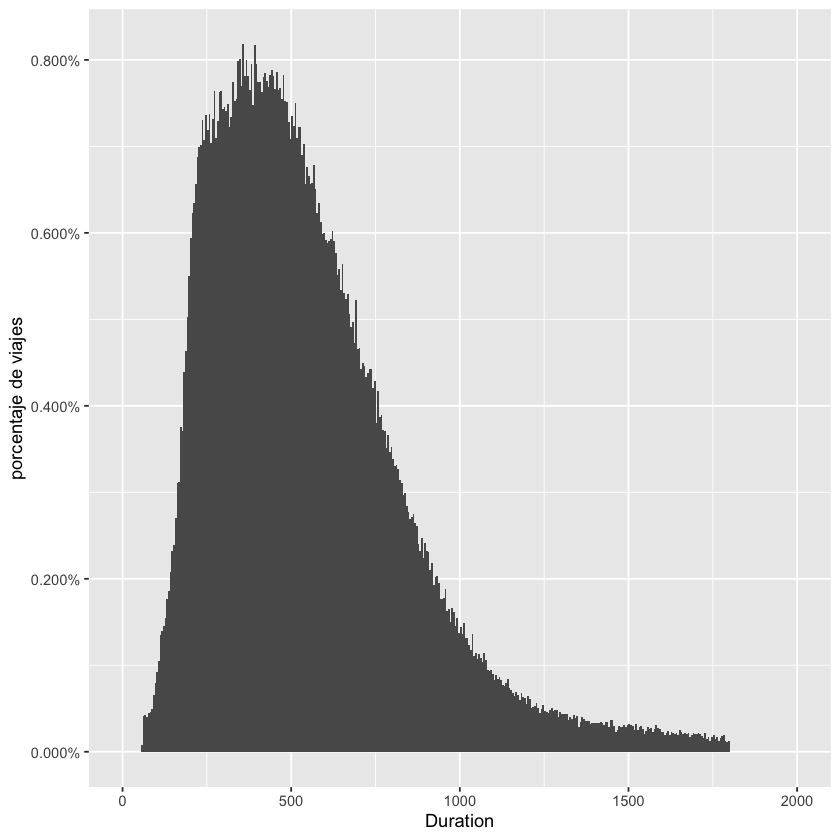

In [65]:
ggplot(viajes) + geom_histogram(breaks = seq(0,2000,by=5), aes(x=Duration, y=(..count..)/sum(..count..))) +
        ylab("porcentaje de viajes") +
        scale_y_continuous(labels = scales::percent_format()) 



# cuidado con los detalles: prueben varios binwidths.

In [67]:
clima <- readr::read_csv("../tablas/bike data/201508_weather_data.csv")

head(clima)

clima.bicis <- clima %>% select(Fecha = PDT, Alta = `Max TemperatureF`, Baja = `Min TemperatureF`) %>% 
        mutate(Alta = round((Alta - 32)*5/9, 0), 
               Baja = round((Baja - 32)*5/9, 0))  


clima.curso <- clima %>% select(Fecha = PDT, Alta = `Max TemperatureF`, Baja = `Min TemperatureF`)

dim(clima.bicis)

head(clima.bicis)
head(clima.curso)

Parsed with column specification:
cols(
  .default = col_double(),
  PDT = col_character(),
  PrecipitationIn = col_character(),
  Events = col_character()
)
See spec(...) for full column specifications.


PDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,⋯,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
9/1/2014,83,70,57,58,56,52,86,64,42,⋯,10,8,16,7,20,0,0,NA,290,94107
9/2/2014,72,66,60,58,57,55,84,73,61,⋯,10,7,21,8,NA,0,5,NA,290,94107
9/3/2014,76,69,61,57,56,55,84,69,53,⋯,10,10,21,8,24,0,4,NA,276,94107
9/4/2014,74,68,61,57,57,56,84,71,57,⋯,10,8,22,8,25,0,5,NA,301,94107
9/5/2014,72,66,60,57,56,54,84,71,57,⋯,9,7,18,8,32,0,4,NA,309,94107
9/6/2014,72,66,60,55,54,52,84,69,53,⋯,9,7,17,9,30,0,4,NA,290,94107


[1] 1825    3

Fecha,Alta,Baja
<chr>,<dbl>,<dbl>
9/1/2014,28,14
9/2/2014,22,16
9/3/2014,24,16
9/4/2014,23,16
9/5/2014,22,16
9/6/2014,22,16


Fecha,Alta,Baja
<chr>,<dbl>,<dbl>
9/1/2014,83,57
9/2/2014,72,60
9/3/2014,76,61
9/4/2014,74,61
9/5/2014,72,60
9/6/2014,72,60


Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

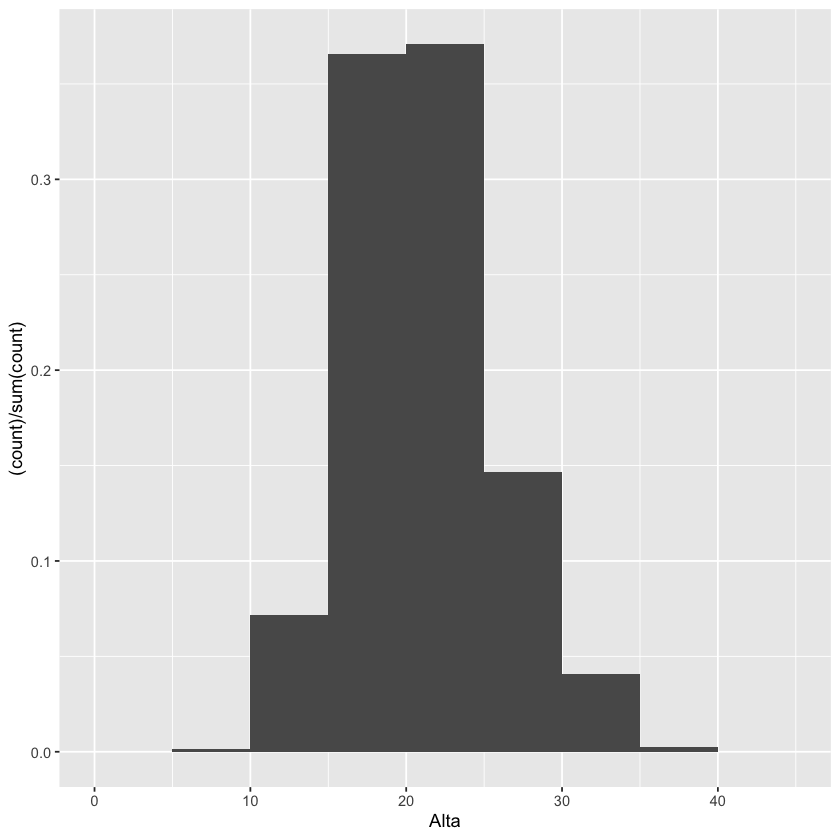

In [68]:
ggplot(clima.bicis, aes(x=Alta, y = (..count..)/sum(..count..))) + geom_histogram(breaks = seq(0,45,by=5))

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

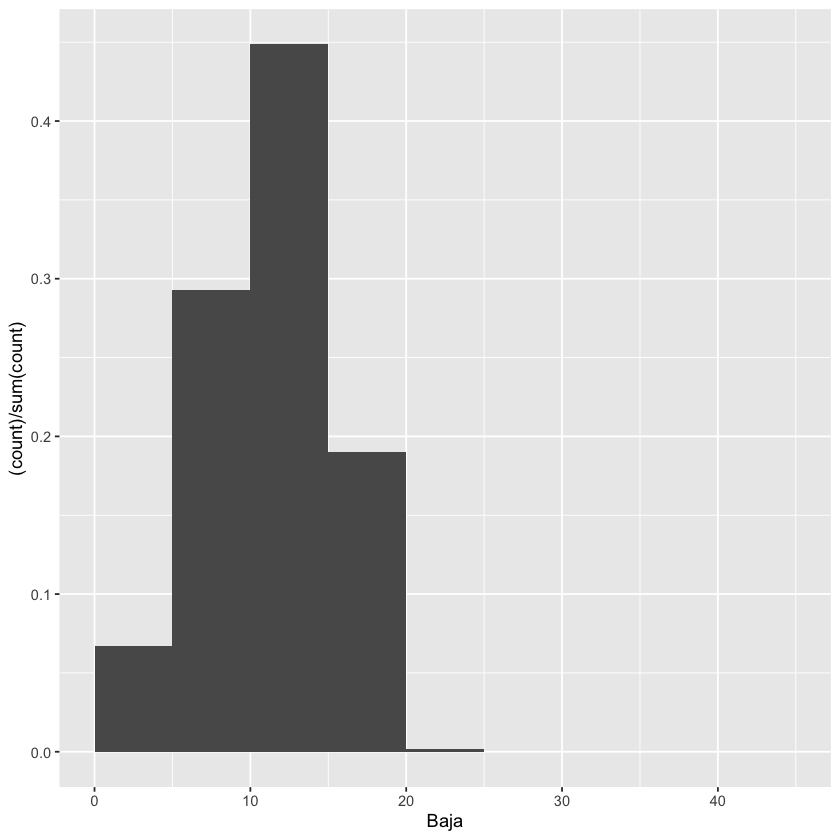

In [69]:
ggplot(clima.bicis, aes(x=Baja, y = (..count..)/sum(..count..))) + geom_histogram(breaks = seq(0,45,by=5))

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

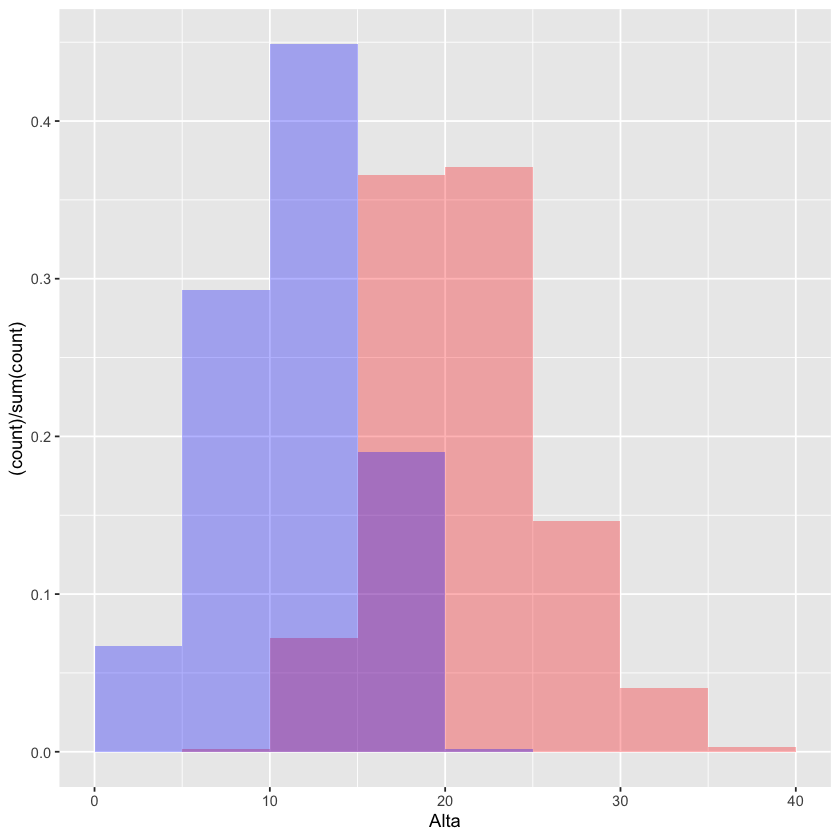

In [70]:
# Podemos comparar dos histogramas:

ggplot(clima.bicis) + 
        geom_histogram(breaks = seq(0,40,by=5), aes(x=Alta, y = (..count..)/sum(..count..)), fill="red", alpha=0.3) +
        geom_histogram(breaks = seq(0,40,by=5), aes(x=Baja, y = (..count..)/sum(..count..)), fill="blue", alpha=0.3)

## Preguntas:

        *Cuál es la proporción de días que tienen una temperatura Alta entre 15 y 19 grados?
        *Cuál es para temperaturas Bajas de mas de 5 grados?
        *Cuántos días tuvieron una diferencia de temperatura mayor a 15 grados?

In [71]:
clima.dif <- clima.bicis %>% mutate(diferencia = Alta - Baja)
head(clima.dif)

Fecha,Alta,Baja,diferencia
<chr>,<dbl>,<dbl>,<dbl>
9/1/2014,28,14,14
9/2/2014,22,16,6
9/3/2014,24,16,8
9/4/2014,23,16,7
9/5/2014,22,16,6
9/6/2014,22,16,6


Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

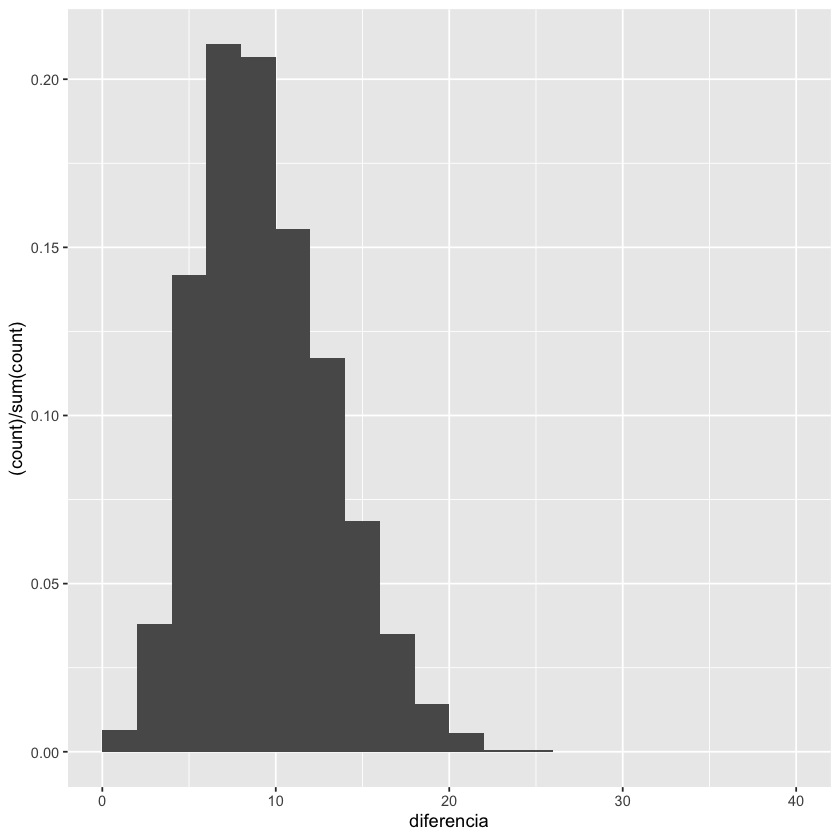

In [72]:
ggplot(clima.dif, aes(x=diferencia, y = (..count..)/sum(..count..))) + 
        geom_histogram(breaks = seq(0,40,by=2))  

# Dos picos? Pueden ser dos tipos de clima? Uno caliente y el otro frio?